In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from PIL import Image

from skimage import data, io, filters, color, exposure
from skimage.transform import rotate

In [2]:
#Checking the train-validation-test split
df_split = pd.read_csv('../00. Dataset/list_eval_partition.csv')
df_split.loc[df_split['partition'] == 0, 'partition_label'] = 'Train' 
df_split.loc[df_split['partition'] == 1, 'partition_label'] = 'Validation'
df_split.loc[df_split['partition'] == 2, 'partition_label'] = 'Test'
df_split.head()

,image_id,partition,partition_label
0,000001.jpg,0,Train
1,000002.jpg,0,Train
2,000003.jpg,0,Train
3,000004.jpg,0,Train
4,000005.jpg,0,Train


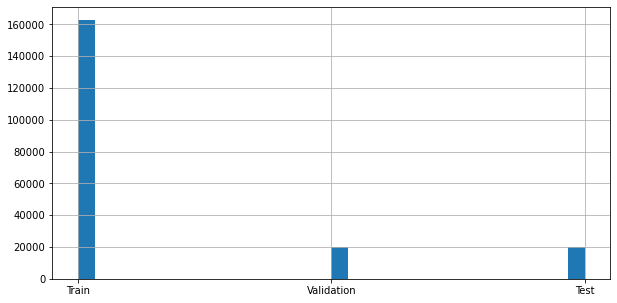

In [3]:
#To see the amount of training data, validation data and test data
df_split.partition_label.hist(bins=30, figsize=(10, 5))
plt.show()

We see that there are over 160000 training images, ~20000 images each in Validation and Test set.

In [4]:
#Checking attributes
df_attributes = pd.read_csv('../00. Dataset/list_attr_celeba.csv')
df_attributes.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [5]:
num_att = (df_attributes.drop(columns = ['image_id'], axis = 1)).shape[1]
print(f'The number of labels for each image: {num_att}')

The number of labels for each image: 40


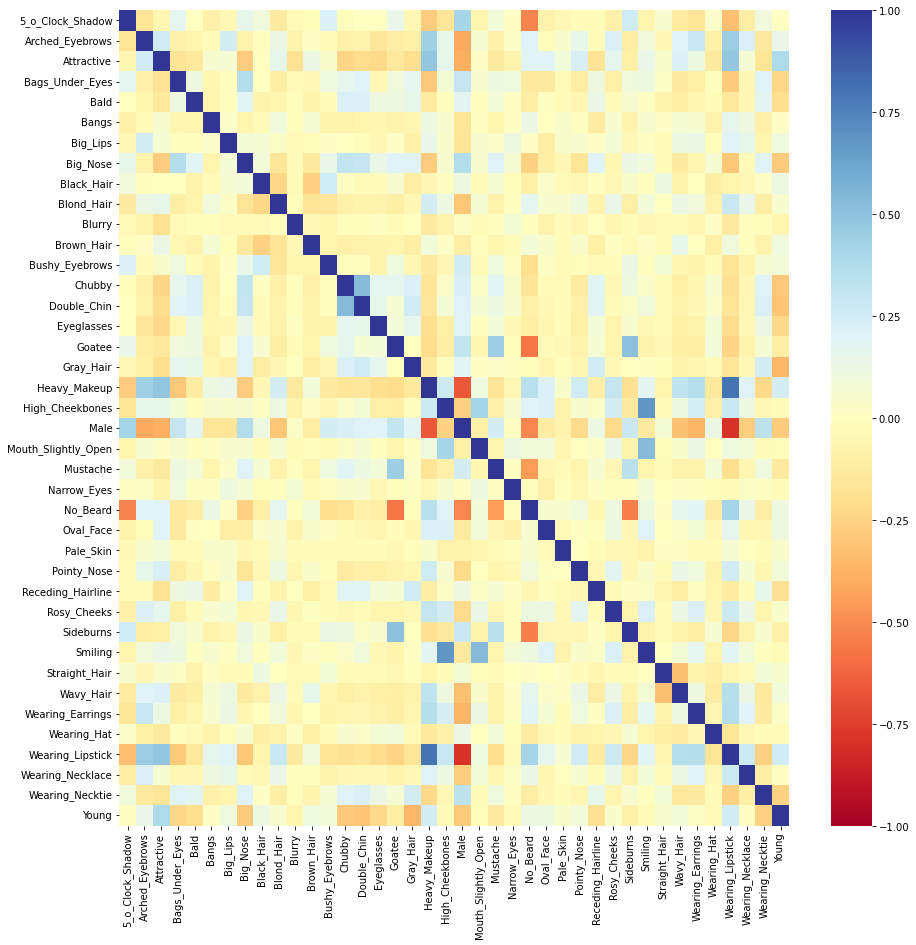

In [6]:
#Checking for correlations between targets
plt.figure(figsize=(15,15))
sns.heatmap(df_attributes.drop(["image_id"],axis=1).corr(), cmap="RdYlBu", vmin=-1, vmax=1)
plt.show()

It is clear that there are some strong correlations such as 
1. Male and Wearing_Lipstick has a strong negative correlation
2. Wearing_lipstick and Heavy_Makeup has a strong positive correlation
3. Male and Goatee have a strong positive correlation

These are understandable correlations. However, few are not straightforward such as no_beard and 5_o_clock_shadow.

In [7]:
#To understand files nomenclature
files = listdir("../00. Dataset/img_align_celeba/img_align_celeba")
files[0:5]

['052628.jpg', '110369.jpg', '161590.jpg', '065084.jpg', '108526.jpg']

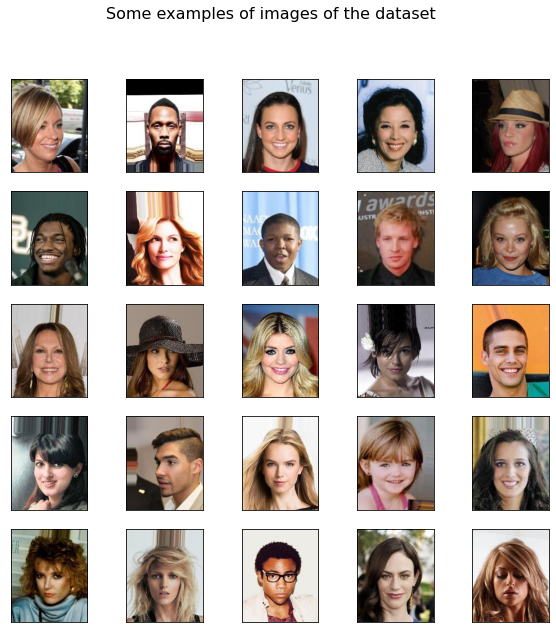

In [13]:
# Define the directory path
dir_path = "../00. Dataset/img_align_celeba/img_align_celeba/"
    
def display_examples(images, dir_path):
    """
        Display n (default: 25) images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        img = np.asarray(Image.open(dir_path + images[i]))
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)#, cmap=plt.cm.binary
    plt.show()

# Display image
display_examples(files[0:25], dir_path)

In this above depiction of images, we can draw some inferences such as
1. Some images will of faces for the sides
2. Some images will have a black block at the top